#**Linear Regression - Boom Bike Case Study**#

**Problem Statenment:**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


Essentials / Requirenments:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [ ]:
# Importing base libraries
import numpy as np
import pandas as pd

# Importing data visulization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Importing skmodel
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score

import statsmodels.api as sm

# Supresses warnings
import warnings
warnings.filterwarnings("ignore")

###**Data understanding and loading**###

In [ ]:
boombikes = pd.read_csv("/content/drive/MyDrive/day.csv")




In [ ]:
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###Data insepction###

In [ ]:
boombikes.shape

(730, 16)

In [ ]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# Renaming the columns
boombikes.rename(columns={'dteday':'Date','yr':'Year','mnth':'Month','hum':'Humidity', 'cnt':'Count'}, inplace=True)

In [ ]:
boombikes.shape

(730, 16)

In [ ]:
boombikes_copy =boombikes.copy()

In [ ]:
boombikes_copy.drop_duplicates(inplace = True)

In [ ]:
print(boombikes.shape)
print(boombikes_copy.shape)

(730, 16)
(730, 16)


In [ ]:
# After drop duplicates also no change in shape so No duplicates. we can use original data frame
boombikes.head()

,instant,Date,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
boombikes.describe()

,instant,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000



 **Pre processing steps**

 Insights from Data:






*   instant is a record index. This is not providing any value for the analysis, so we can drop.

*   season, (1:spring, 2:summer, 3:fall, 4:winter), keeping the same is problem for calculation, need to represent as categorical variable in terms of string.

*   Date is a date on which instance is created, This is duplicate information provided by another column yr and month so we can drop.

*   weekday Sunday to Saturday represented in 0 to 6 numbers respectively, keeping the same is problem for calculation, need to represent as categorical variable in terms of string.

*   weathersit (1:clear, 2:mist, 3:light_snow, 4:heavy_rain), keeping the same is problem for calculation, need to represent as categorical variable in terms of string

*   temp, atemp, hum, windspeed: what are values on perticular day represented in float values.

*   casual and registered: rental bikes count in casual and registered. The total count is expressed in cnt column, so we can drop.














###**Data Cleaning**###

In [ ]:
boombikes.drop(['instant', 'Date', 'casual', 'registered'], axis=1, inplace=True)

In [ ]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   Year        730 non-null    int64  
 2   Month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [ ]:
boombikes.isnull().sum()

,0
season,0
Year,0
Month,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
Humidity,0


In [ ]:
# Map Season
boombikes['season'] = boombikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [ ]:
boombikes['season'].value_counts()

,count
season,
fall,188
summer,184
spring,180
winter,178


In [ ]:
# Map Weekday
boombikes['weekday'] = boombikes['weekday'].map({0:'sun', 1:'mon', 2:'tue', 3:'wedn', 4:'thu', 5:'fri', 6:'sat'})

In [ ]:
boombikes['weekday'].value_counts()

,count
weekday,
sat,105
sun,105
mon,105
tue,104
thu,104
fri,104
wedn,103


In [ ]:
# Map month
boombikes['Month'] = boombikes['Month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [ ]:
boombikes['Month'].value_counts()

,count
Month,
jan,62
mar,62
may,62
july,62
aug,62
oct,62
dec,62
apr,60
june,60


In [ ]:
boombikes['weathersit'] = boombikes['weathersit'].map({1:'Clear', 2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [ ]:
boombikes['weathersit'].value_counts()

,count
weathersit,
Clear,463
Misty,246
Light_snowrain,21


In [ ]:
boombikes.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,Count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wedn,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


###**Exploratory Data Analysis - EDA**###

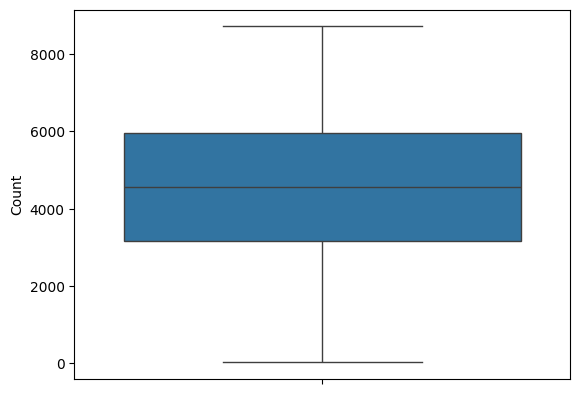

In [ ]:
sns.boxplot(boombikes['Count'])
plt.show()

###Univariate Analysis###


*   Understanding distribution, outliers of each categorical variables




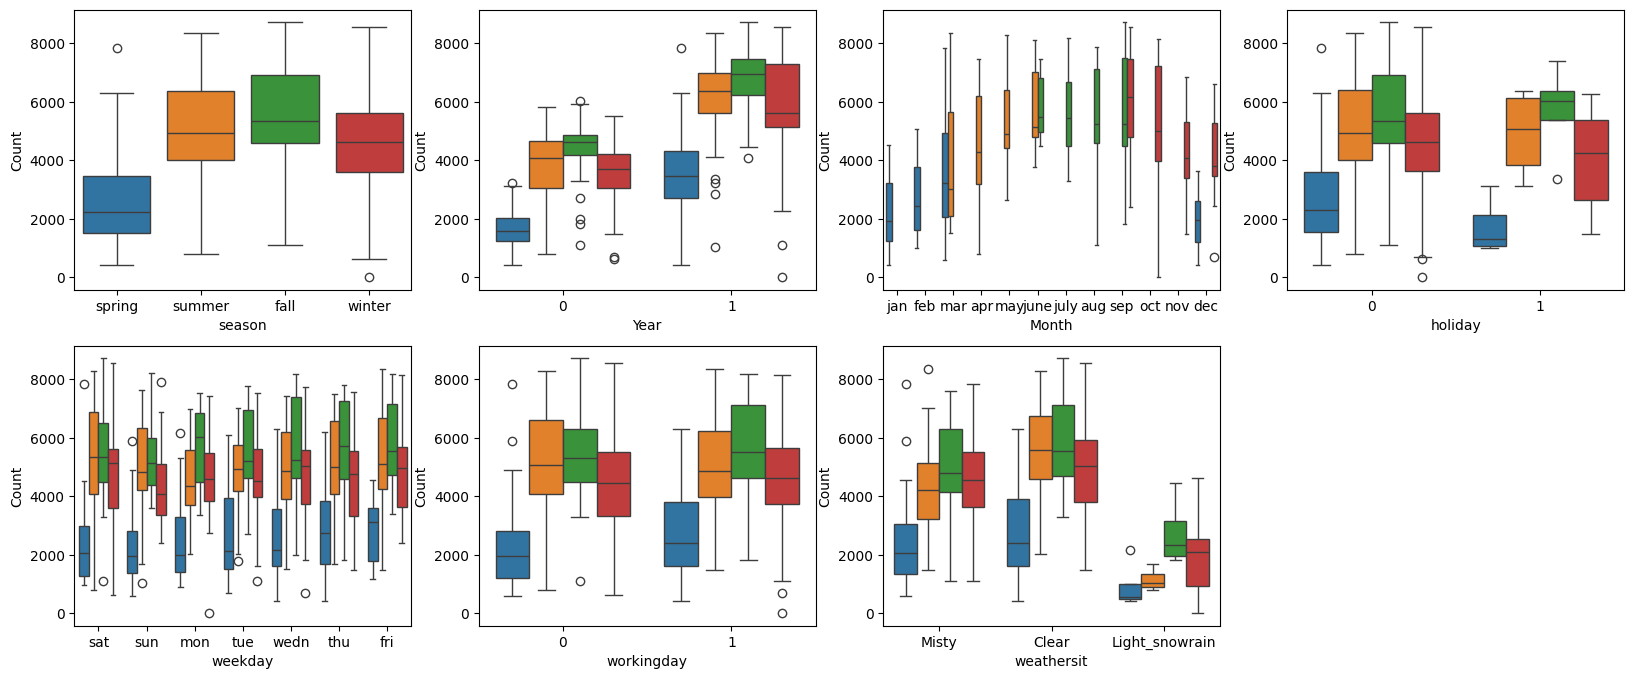

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(2,4,1)
sns.boxplot(x='season', y='Count', hue='season', legend=False, data=boombikes)

plt.subplot(2,4,2)
sns.boxplot(x='Year', y='Count', hue='season', legend=False, data=boombikes)

plt.subplot(2,4,3)
sns.boxplot(x='Month', y='Count', hue='season', legend=False, data=boombikes)

plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='Count', hue='season', legend=False, data=boombikes)

plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='Count', hue='season', legend=False, data=boombikes)

plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='Count', hue='season', legend=False, data=boombikes)

plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='Count', hue='season', legend=False, data=boombikes)

plt.show()

Result

*   There are no much outliers, so no records needs to be removed.




###**Bivariate Analysis**###



*   Bivariate analysis focuses on examining the relationship between two variables to understand how changes in one variable affect the other.
* Data with years 2018 and 2019, we can compare category variables across these two years to observe trends or differences.




In [ ]:
def plot_barchart(xcolumn):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.barplot(x=xcolumn, y='Count', hue=xcolumn, data=boombikes)
    plt.subplot(1,2,2)
    sns.barplot(x=xcolumn, y='Count', hue='Year', data=boombikes)
    plt.legend(labels=['2018', '2019'])
    plt.show()

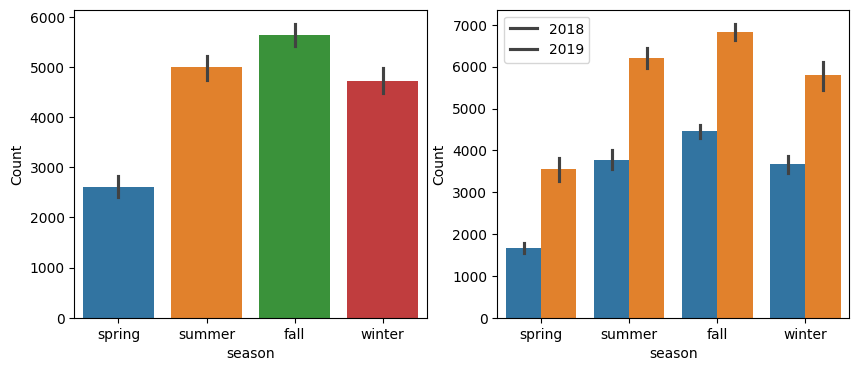

In [ ]:
plot_barchart('season')

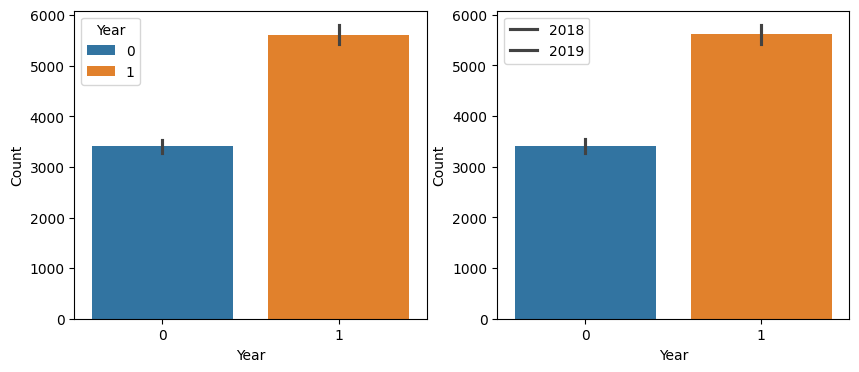

In [ ]:
plot_barchart('Year')

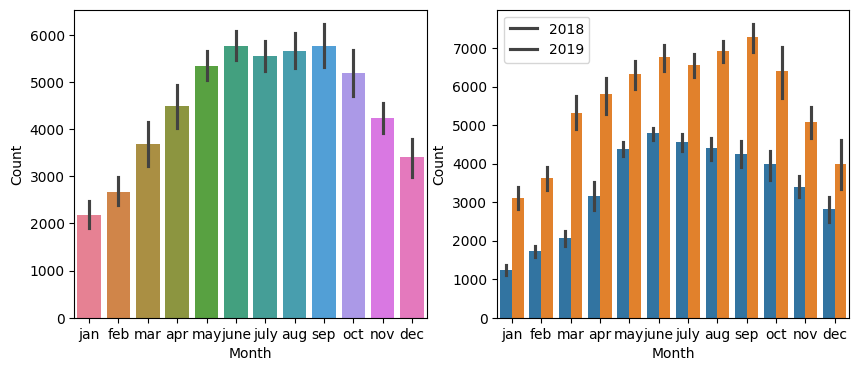

In [ ]:
plot_barchart('Month')

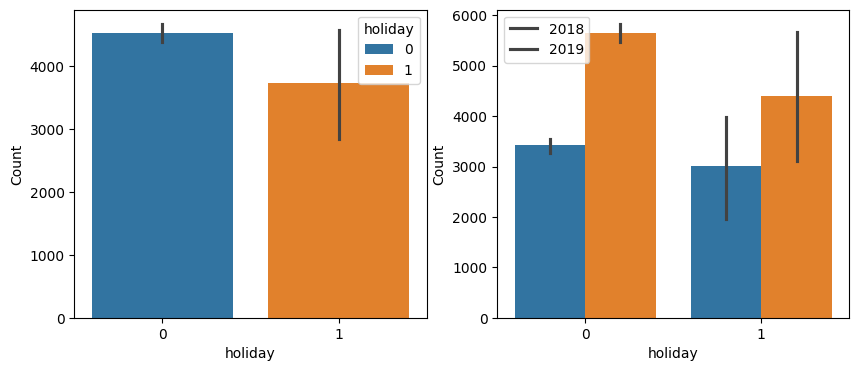

In [ ]:
plot_barchart('holiday')

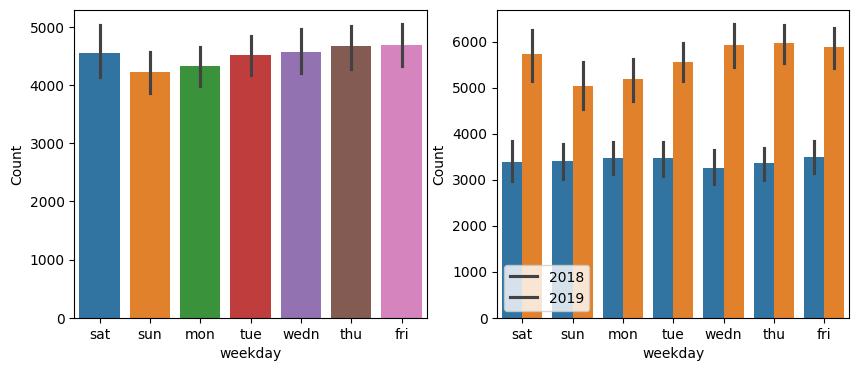

In [ ]:
plot_barchart('weekday')

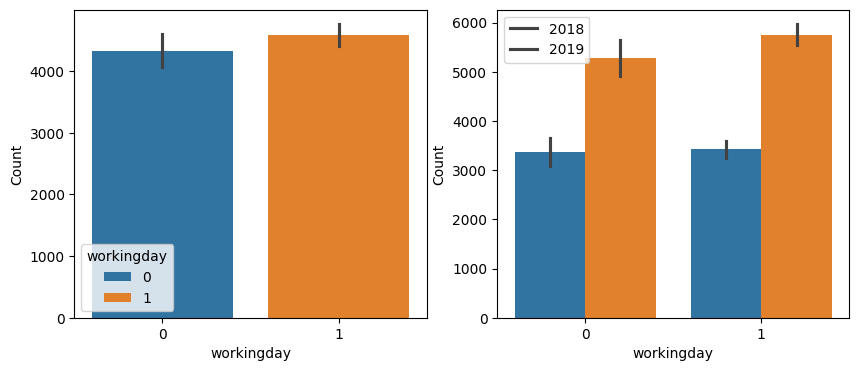

In [ ]:
plot_barchart('workingday')

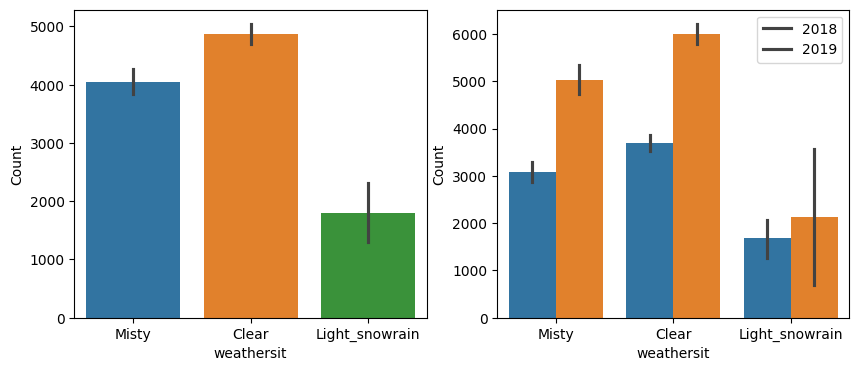

In [ ]:
plot_barchart('weathersit')

Results

*   More bikes are rented in 2019 than 2018 in all weather conditions
*   Overall 2019 is dominating over 2018 in all independent features





###**Multivariate Analysis**###



*   Multivariate analysis involves examining relationships among three or more variables simultaneously.
* Given data, this could include studying how category variables interact across the years 2018 and 2019 to affect a target variable like revenue or customer satisfaction.



In [ ]:

def plot_multivariate(xcolumn, category_column):
    plt.figure(figsize=(14, 6))

    # Subplot 1: Category-level bar chart
    plt.subplot(1, 2, 1)
    sns.barplot(x=xcolumn, y='Count', hue=category_column, data=boombikes)
    plt.title(f"{xcolumn} vs Count by {category_column}")
    plt.xlabel(xcolumn)
    plt.ylabel("Count")

    # Subplot 2: Year-wise breakdown
    plt.subplot(1, 2, 2)
    sns.barplot(x=xcolumn, y='Count', hue='Year', data=boombikes)
    plt.legend(labels=['2018', '2019'])
    plt.title(f"{xcolumn} vs Count by Year")
    plt.xlabel(xcolumn)
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()


In [ ]:
#plot_multivariate(xcolumn='Region', category_column='Category')

##Numarical Variables Analysis##

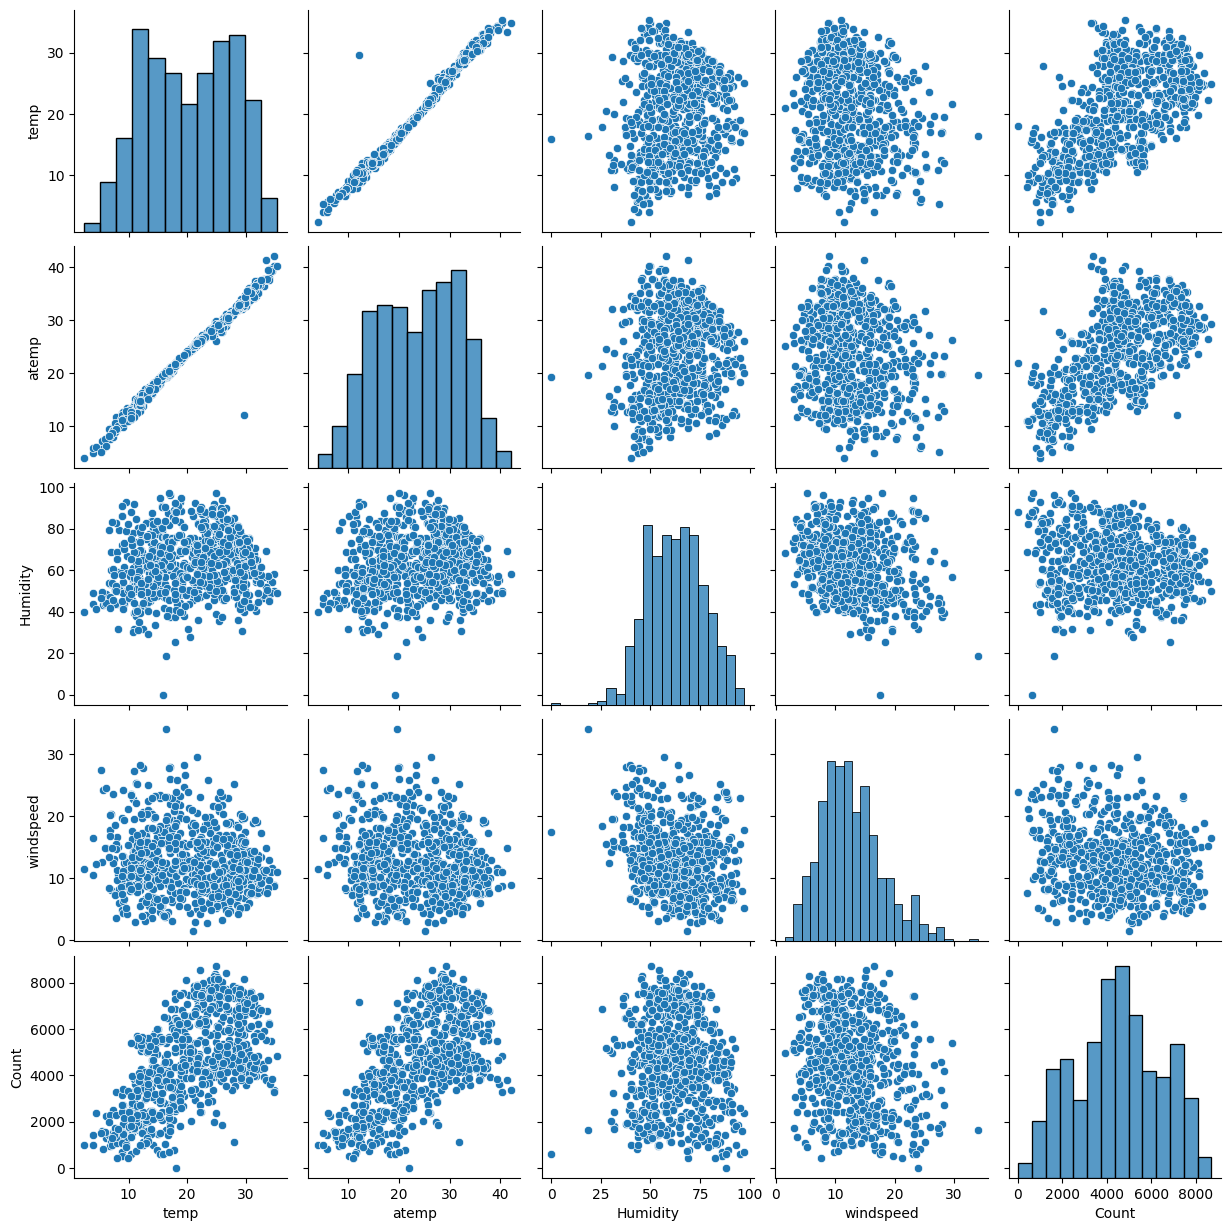

In [ ]:

sns.pairplot(data=boombikes,vars=['temp','atemp','Humidity','windspeed','Count'])
plt.show()

As we can see how data points are distributed. There is an increase in rentals during temp 20-30 celcius, atemp 25-30 celcius, humidity 35 - 90. Windspeed is not affecting much for rentals upto 20.

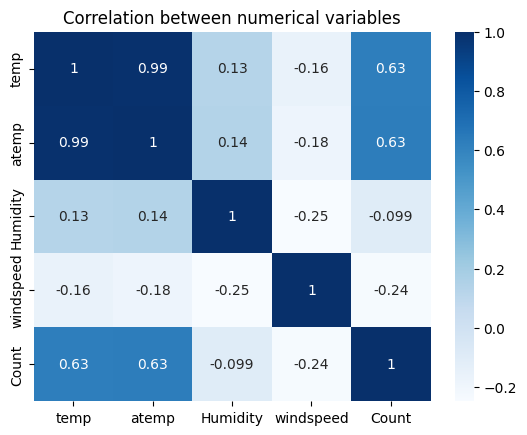

In [ ]:
sns.heatmap(boombikes[['temp', 'atemp', 'Humidity', 'windspeed', 'Count']].corr(),annot = True, cmap="Blues")
plt.title('Correlation between numerical variables')
plt.show()

linear relationship between temp and atemp



**One can be dropped for the model based on p-value and VIF value to avoid multicollinearity**

###**Data Preparation**###

In [ ]:
def create_append_dummies(colName, df):
    var_dummy = pd.get_dummies(df[colName], drop_first=True, dtype=int)
    df = pd.concat([df, var_dummy], axis=1)
    df.drop([colName], axis = 1, inplace = True)
    return df;

In [ ]:
columns = ['season', 'Month', 'weekday', 'weathersit']
for column in columns:
    boombikes = create_append_dummies(column, boombikes)

In [ ]:
boombikes.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wedn,Light_snowrain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
boombikes.shape

(730, 30)

In [ ]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   Humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   Count           730 non-null    int64  
 8   spring          730 non-null    int64  
 9   summer          730 non-null    int64  
 10  winter          730 non-null    int64  
 11  aug             730 non-null    int64  
 12  dec             730 non-null    int64  
 13  feb             730 non-null    int64  
 14  jan             730 non-null    int64  
 15  july            730 non-null    int64  
 16  june            730 non-null    int64  
 17  mar             730 non-null    int

**Train Test Split**

In [ ]:
np.random.seed(0)
boombikes_train, boombikes_test = train_test_split(boombikes, train_size = 0.7, random_state = 100)

In [ ]:
boombikes_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wedn,Light_snowrain,Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


**Scaling**

In [ ]:
scaler = MinMaxScaler()

In [ ]:
num_vars = ['temp','atemp','Humidity','windspeed','Count']
boombikes_train[num_vars] = scaler.fit_transform(boombikes_train[num_vars])

In [ ]:
boombikes_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wedn,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


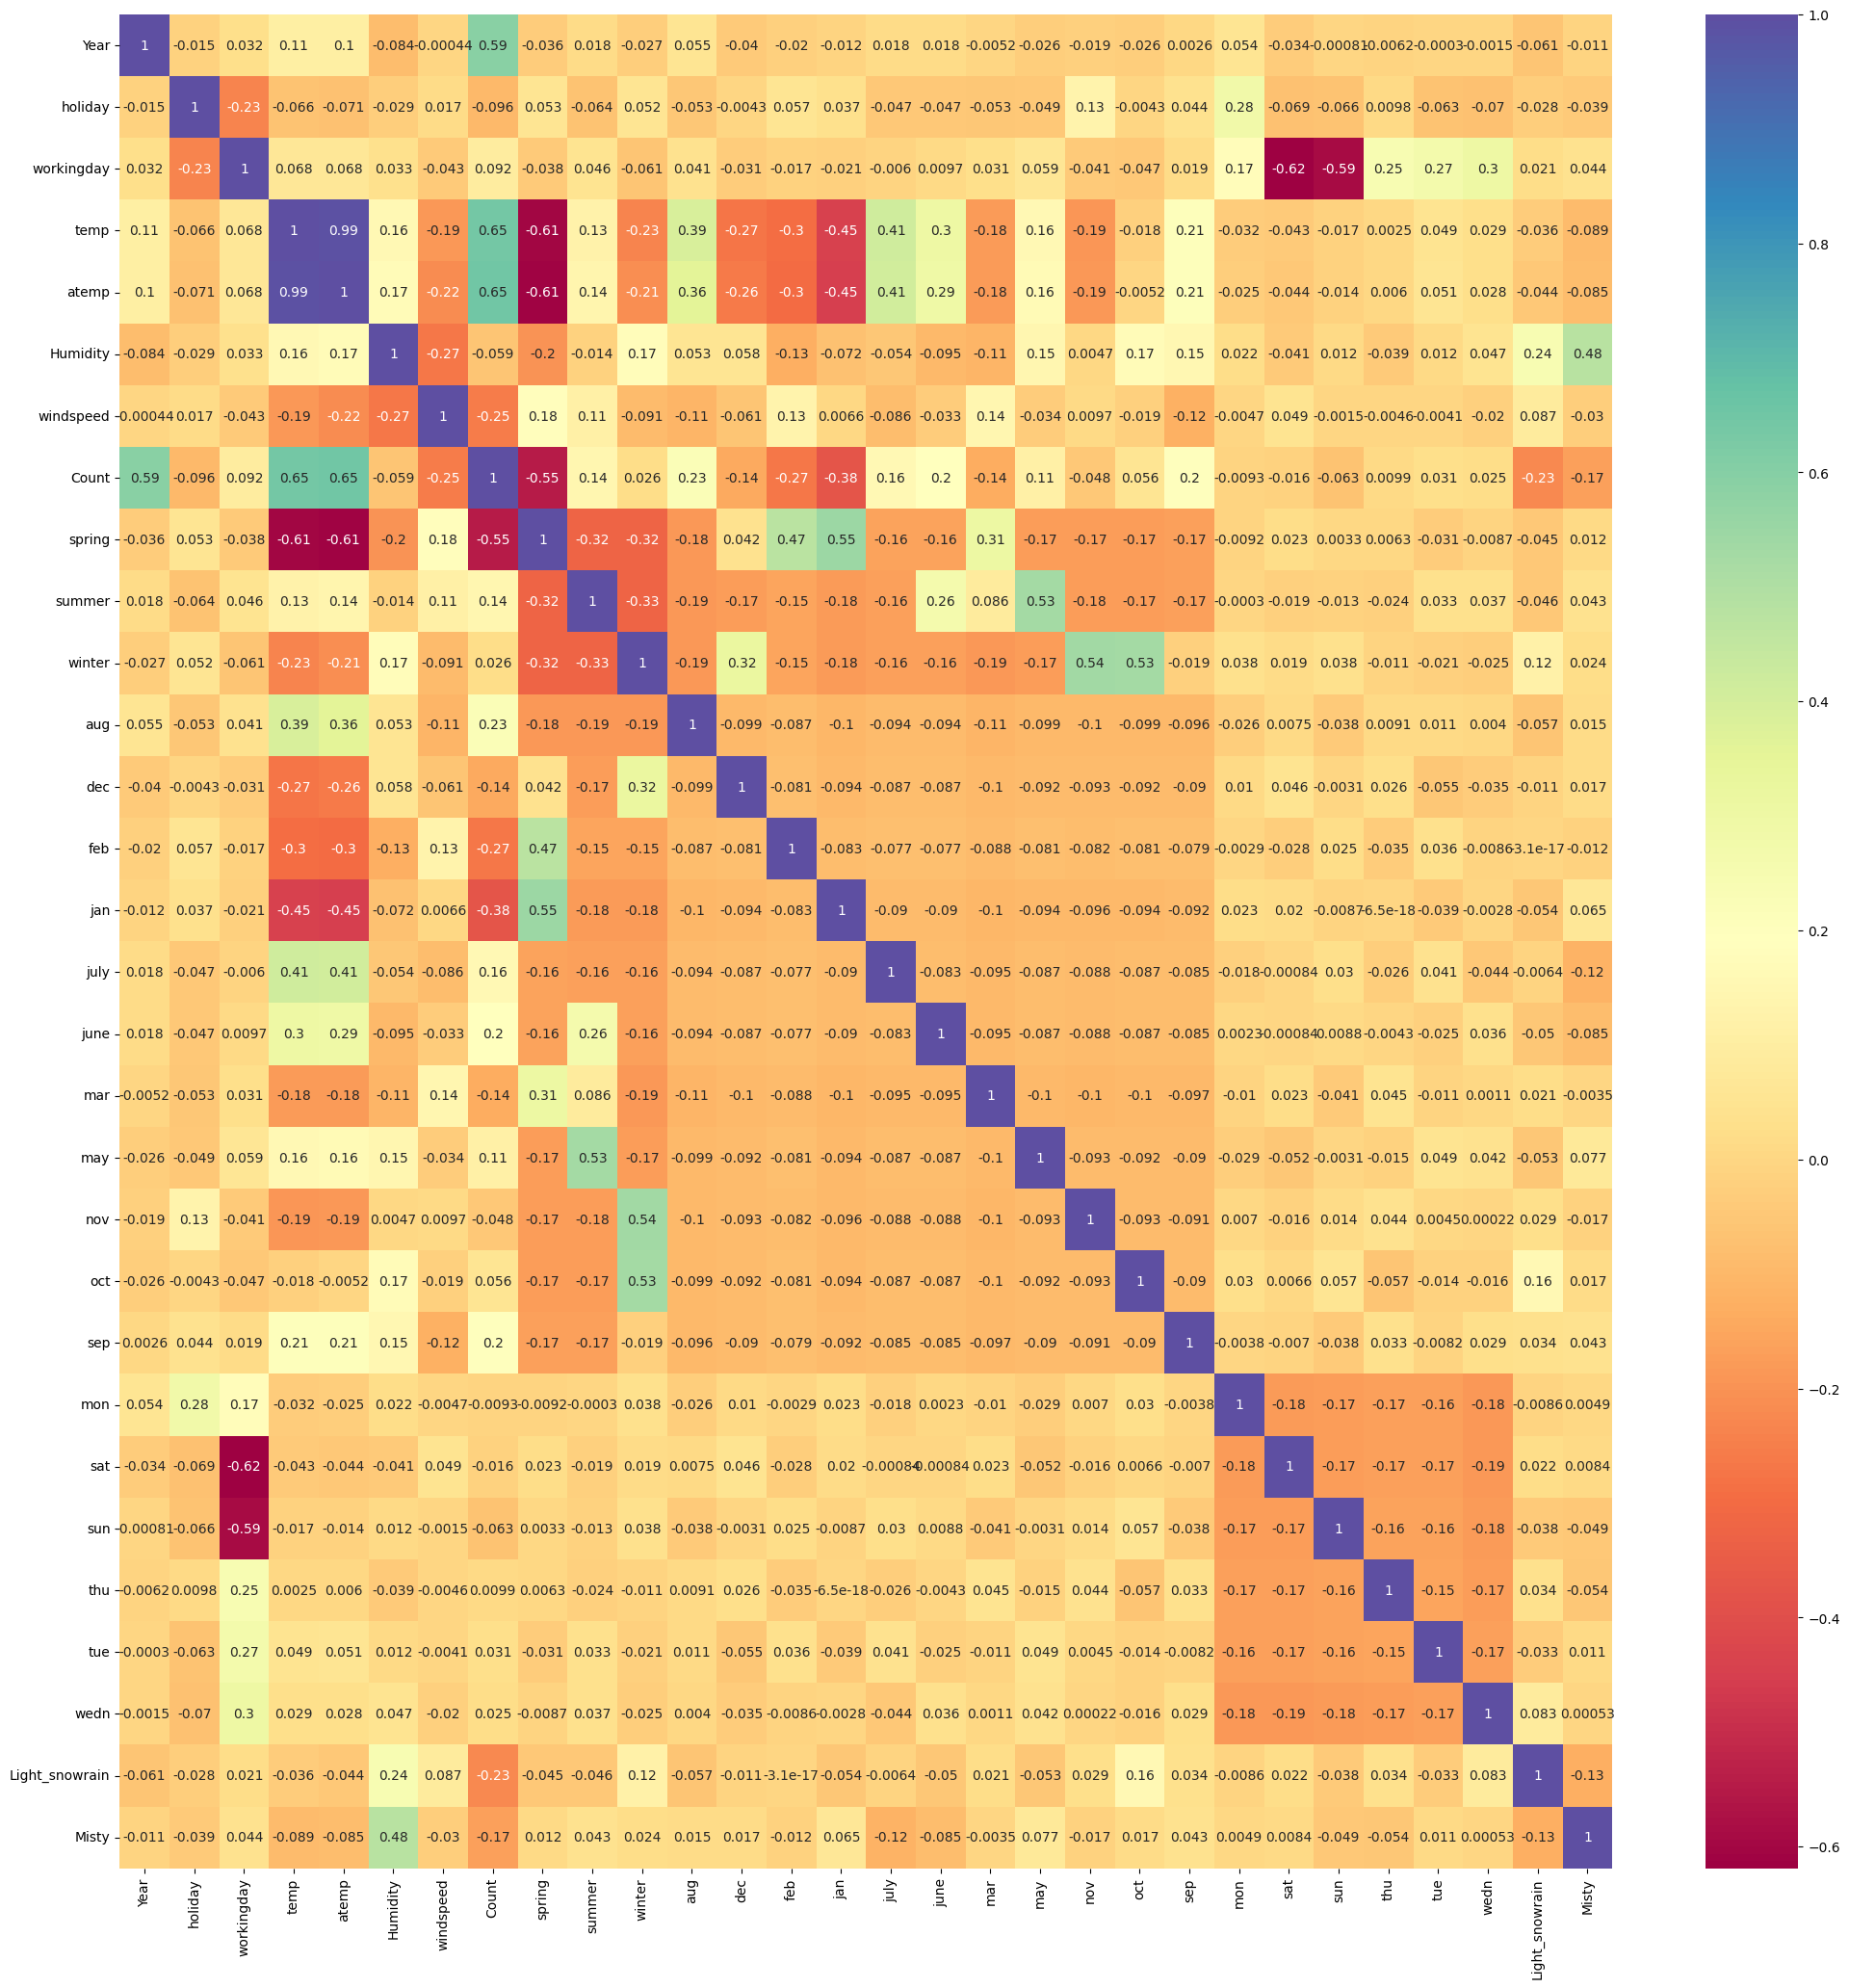

In [ ]:
# Verifying which variables are highly correlated.

plt.figure(figsize = (25,25))
sns.heatmap(boombikes_train.corr(), annot = True, cmap="Spectral")
plt.show()

Count have a correlation with temp and atemp.

*   May month in summer season have a good correlation.
*   Oct and Nov in winter season have a good correlation.
*   Jan and Feb in spring season showing good correlation.









**Feature Selection**

**Module Building**

In [ ]:
y_train = boombikes_train.pop('Count')
X_train = boombikes_train

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wedn', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [ ]:
selectedColumns = X_train.columns[rfe.support_]

In [ ]:
print(selectedColumns)

Index(['Year', 'holiday', 'workingday', 'temp', 'Humidity', 'windspeed',
       'spring', 'summer', 'winter', 'jan', 'july', 'sep', 'sat',
       'Light_snowrain', 'Misty'],
      dtype='object')


In [ ]:
# prepare data frame with only selected columns

X_train_rfe = X_train[selectedColumns]

Building first linear model

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          4.22e-191
Time:                        13:05:44   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
14,Misty,2.29
0,Year,2.09
12,sat,1.98


In [ ]:
# Humidity showing high VIF, can be dropped

X_train_new = X_train_rfe.drop(['Humidity'], axis = 1)

Second linear model

In [ ]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.60e-188
Time:                        13:05:44   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,spring,3.07
6,summer,2.34
0,Year,2.08
7,winter,1.98
11,sat,1.97
8,jan,1.62
9,july,1.59


In [ ]:
# holiday showing high P-Value we can drop

X_train_new = X_train_new.drop(['holiday'], axis = 1)

Third linear model

In [ ]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          8.68e-189
Time:                        13:05:44   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,spring,2.99
5,summer,2.33
0,Year,2.08
6,winter,1.91
10,sat,1.84
7,jan,1.62
8,july,1.59


In [ ]:
# jan showing slightly high P-Value, we can remove
X_train_new = X_train_new.drop(['jan'], axis = 1)

Fourth Linear module

In [ ]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          7.12e-189
Time:                        13:05:44   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1492      0.031      4.

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,spring,2.38
5,summer,2.32
0,Year,2.07
6,winter,1.91
9,sat,1.83
7,july,1.58
11,Misty,1.57


In [ ]:
# july has high P-Value, we can remove it
X_train_new = X_train_new.drop(['july'], axis = 1)

Fifth linear module

In [ ]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.42e-188
Time:                        13:05:44   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1406      0.031      4.

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
4,spring,2.30
0,Year,2.07
5,summer,2.00
8,sat,1.83
6,winter,1.76
10,Misty,1.57
7,sep,1.23


In [ ]:
# VIF value is still higher than 5, next high p value is spring. we can remove and check

X_train_new = X_train_new.drop(['spring'], axis = 1)

Sixth Linear Model

In [ ]:
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          3.13e-188
Time:                        13:05:44   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0750      0.019      4.

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,Year,2.02
7,sat,1.69
4,summer,1.57
9,Misty,1.53
5,winter,1.40
6,sep,1.20
8,Light_snowrain,1.08


All VIF values is under 5 now

Above we can see there is very low multicollinearity in the model.

*   R Square shows 83% variance, which is good to consider.
*   F statistics is 253.0 which is greater than 1.
*   Probability F statistics 3.13e-188 is almost 0.

Overall states that model is significant.

**Residual Analysis**

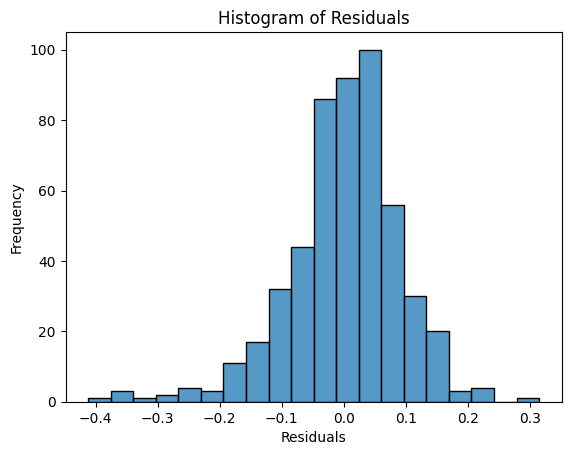

In [ ]:
# Distributaion of Residuals
sns.histplot(lr_6.resid, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

Above histogram shows residuals / error terms are normally distributed. This is good indication of appropriate model.

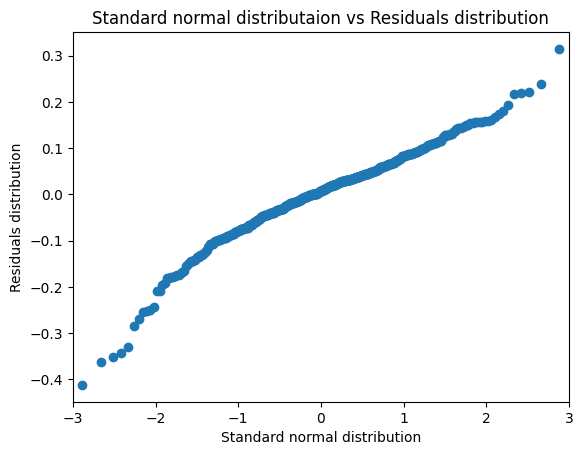

In [ ]:
sm.qqplot(lr_6.resid)
plt.title("Standard normal distributaion vs Residuals distribution")
plt.xlabel("Standard normal distribution")
plt.ylabel("Residuals distribution")
plt.show()

Data points are falling approximately on the stright line, means residuals are normally distributed

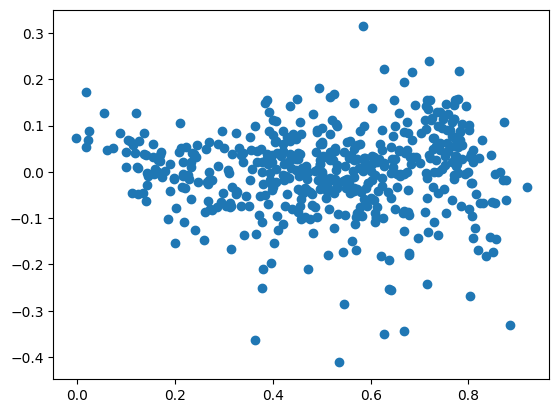

In [ ]:
plt.scatter(lr_6.fittedvalues, lr_6.resid)
plt.show()

Residuals are randomly scattered around 0 and there is no pattern observed, good indication of model is appropriate

**Independence of Residuals**

Durbin Watson value in final model lr_6 is 2.089. Indicates there is no autocorrelation.

**Predictions on test data**

In [ ]:
boombikes_test.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wedn,Light_snowrain,Misty
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
boombikes_test.shape

(220, 30)

Scaling numeric variables of test data

In [ ]:
numeric_vars = ['temp', 'atemp', 'Humidity', 'windspeed', 'Count']

boombikes_test[numeric_vars] = scaler.transform(boombikes_test[numeric_vars])

In [ ]:
boombikes_test.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wedn,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y_test = boombikes_test.pop('Count')
X_test = boombikes_test

In [ ]:
X_test = X_test[X_train_new.columns]

In [ ]:
X_test.head()

,Year,workingday,temp,windspeed,summer,winter,sep,sat,Light_snowrain,Misty
184,0,0,0.831783,0.084219,0,0,0,0,0,1
535,1,1,0.901354,0.153728,1,0,0,0,0,0
299,0,1,0.511964,0.334206,0,1,0,0,0,1
221,0,1,0.881625,0.339570,0,0,0,0,0,0
152,0,1,0.817246,0.537414,1,0,0,0,0,0


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test_lm_6  = sm.add_constant(X_test)

In [ ]:
y_test_pred = lr_6.predict(X_test_lm_6)

In [ ]:
r2 = r2_score(y_test, y_test_pred)
round(r2, 4)

0.7961

**Adjusted R2 square**

In [ ]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7864


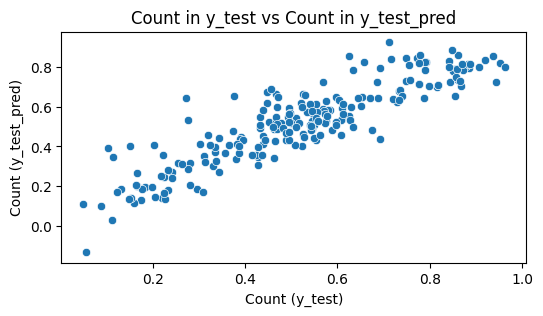

In [ ]:
plt.figure(figsize = (6,3))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title("Count in y_test vs Count in y_test_pred")
plt.xlabel("Count (y_test)")
plt.ylabel("Count (y_test_pred)")
plt.show()

R2 score is 0.7961 approximately equals to 0.8


*   R2 squared value from train data set 0.83
*   R2 squared value from test data set is 0.8
*   Adjusted R2 squared value from train data set is 0.832
*   Adjusted R2 squared value from test data set is 0.7864

So R2 squared and Adjusted R2 squared from train and test set are very close, so prediction is appropriate

In [ ]:
round(lr_6.params, 2)

,0
const,0.08
Year,0.23
workingday,0.06
temp,0.55
windspeed,-0.16
summer,0.09
winter,0.13
sep,0.10
sat,0.07
Light_snowrain,-0.29


**conclusion**

Year, workingday, temp, windspeed, summer, winter, sep, sat, Light_snowrain, Misty are influencing bike rental demand